<a href="https://colab.research.google.com/github/pretyjoshi/LgccPythonProject/blob/main/project_1_student_data_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This project is to analyse student test performance.**

The data was downloaded from CUNY Laugardia Data Analytics' Github page to the  github repository of "pretyjoshi". It was then imported to Google Colab using the raw data URL.
---

In [2]:
# Step 1. Library  import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Step 2.1 Data loading and inspection

schooldata=pd.read_csv('https://raw.githubusercontent.com/pretyjoshi/LgccPythonProject/refs/heads/main/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

#Check Data size and variables
print("total rows = ",len(schooldata))
schooldata.info()

total rows =  212331
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  objec

In [4]:
# Step 2.2
#View rows of data
schooldata.head()


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [5]:
# Step 2.2
#View rows of data
schooldata.tail()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na
212330,84X717,Icahn Charter School,K-8,U.S. History and Government,2015,1,s,s,s,s,s,s,s,na,na


**Key obesrvations**


1. There can be multiple rows for same school DBN and NAME .
check schooldata.head(3)

2. The school can have data for differnt year. e.g. 2015, 2016, etc.

3. For a same year, school can have data for differnt Regents Exam. e.g. Common Core Algebra, Living Environment, etc.

4. Even for same year and Exam, 'Total Tested' can be different. It could be probably due to diffence in test dates. Although, no date is provided in data.

5. Different rows can also be possible for Grade level. eg. k-8, HighSchool etc.

6. Finally, some numeric columns have non numric or na values. We want to make sure that column 7 till 15 has only number values.

**For comparison**:

We want to have only one row for each subject and grade for a given year. So, we should combine the number of total tested for specific combination.

e.g. 2017:k-8:Algebra, 2015:HighSchool:English




In [6]:
# STEP3.1: CHECK FOR MISSING VALUE
schooldata.isnull().head(3)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
print(" Total NA CELL  =")
print(schooldata.isna().sum())



 Total NA CELL  =
School DBN                      0
School Name                     0
School Level                    0
Regents Exam                   10
Year                            0
Total Tested                    0
Mean Score                      0
Number Scoring Below 65         0
Percent Scoring Below 65        0
Number Scoring 65 or Above      0
Percent Scoring 65 or Above     0
Number Scoring 80 or Above      0
Percent Scoring 80 or Above     0
Number Scoring CR               0
Percent Scoring CR              0
dtype: int64


In [10]:
# STEP3.2: View rows with missing values
null_rows = schooldata.loc[schooldata['Regents Exam'].isna()]
null_rows

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
18654,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,90,55.6,61,67.8,29,32.2,6,6.7,0,0
52756,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,81,55.9,55,67.9,26,32.1,5,6.2,0,0
52757,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,9,53.4,6,66.7,3,33.3,1,11.1,0,0
100865,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,5,s,s,s,s,s,s,s,na,na
100866,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,54,57.4,34,63,20,37,6,11.1,0,0
100867,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,31,s,s,s,s,s,s,s,na,na
138300,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,54,57.3,34,63,20,37,5,9.3,0,0
138301,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,36,53.2,27,75,9,25,1,2.8,0,0
209785,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,12,59,9,75,3,25,1,8.3,0,0
209786,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,78,55.1,52,66.7,26,33.3,5,6.4,0,0


In [11]:
# STEP3.3: Remove rows with NA values in Regents Exam
schooldata=schooldata.dropna(subset=['Regents Exam'])

schooldata.tail()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na
212330,84X717,Icahn Charter School,K-8,U.S. History and Government,2015,1,s,s,s,s,s,s,s,na,na


Still many rows that should have numeric values may have string Data e,g 's', 'na' etc.

We need to filter those rows by converting all values in selected columns to numeric.

Selected rows with non numeric values include following columns ,


'Mean Score',
'Number Scoring Below 65',
'Percent Scoring Below 65',
'Number Scoring 65 or Above',
'Percent Scoring 65 or Above',
'Number Scoring 80 or Above',
'Percent Scoring 80 or Above',
'Number Scoring CR',
'Percent Scoring CR'

Non-numric will be coerces to NA and then removed

In [13]:
#STEP3.4:filtering by removing STRING values from numeric data.
# Select columns
cols = schooldata.columns[6:15]

schooldata[cols] = schooldata[cols].apply(pd.to_numeric, errors='coerce')
schooldata.tail(2)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212330,84X717,Icahn Charter School,K-8,U.S. History and Government,2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
schooldata.isnull().tail(3)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
212328,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
212329,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
212330,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True


In [15]:
print(" Total NA CELL  =")
print(schooldata.isna().sum())

 Total NA CELL  =
School DBN                          0
School Name                         0
School Level                        0
Regents Exam                        0
Year                                0
Total Tested                        0
Mean Score                      75220
Number Scoring Below 65         75220
Percent Scoring Below 65        75220
Number Scoring 65 or Above      75220
Percent Scoring 65 or Above     75220
Number Scoring 80 or Above      75220
Percent Scoring 80 or Above     75220
Number Scoring CR              142678
Percent Scoring CR             142678
dtype: int64


In [16]:
## Remove rows with NA
print("Rows before cleaing = ", len(schooldata ))

schooldata = schooldata.dropna(subset=cols)
print("Rows after removing NA = ",len(schooldata ))
schooldata.reset_index()



Rows before cleaing =  212321
Rows after removing NA =  69643


,index,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1.0,2.0,48.0,98.0,23.0,46.9,48.0,98.0
1,9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0,9.0,17.6,42.0,82.4,33.0,64.7,40.0,78.4
2,10,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8,0.0,0.0,51.0,100.0,44.0,86.3,50.0,98.0
3,12,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9,14.0,60.9,9.0,39.1,0.0,0.0,2.0,8.7
4,13,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2016,22,69.0,6.0,27.3,16.0,72.7,2.0,9.1,15.0,68.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69638,212311,84X706,Harriet Tubman Charter School,K-8,Common Core Algebra,2017,15,82.6,0.0,0.0,15.0,100.0,12.0,80.0,15.0,100.0
69639,212320,84X717,Icahn Charter School,K-8,Common Core Algebra,2016,8,87.9,0.0,0.0,8.0,100.0,7.0,87.5,8.0,100.0
69640,212321,84X717,Icahn Charter School,K-8,Common Core Algebra,2016,6,87.2,0.0,0.0,6.0,100.0,6.0,100.0,6.0,100.0
69641,212322,84X717,Icahn Charter School,K-8,Common Core Algebra,2017,6,87.0,0.0,0.0,6.0,100.0,6.0,100.0,6.0,100.0


Now, schooldata is clean. No NA, NaN, or NULL values.

In [18]:
## Selecting a random school.

print(schooldata.iloc[10]["School Name"])
schooldata.iloc[10]



Orchard Collegiate Academy


,25
School DBN,01M292
School Name,Orchard Collegiate Academy
School Level,High school
Regents Exam,Common Core English
Year,2015
Total Tested,34
Mean Score,61.5
Number Scoring Below 65,15.0
Percent Scoring Below 65,44.1
Number Scoring 65 or Above,19.0


In the above exmaple, the output is only ONE entry for school "Orchard Collegiate Academy"

There can be several more entries depending up the year, regents exmams, Total Tested, and school level.

We will first check all the data for schoool "Orchard Collegiate Academy
". And then, summrize them for each year and exams.

In [19]:
#Select all data of desired school under name "First _School"

first_school=schooldata[schooldata["School Name"]=="Orchard Collegiate Academy"]

print("total entries for school_one (Orchard Collegiate Academy) for ALL YEARS, EXAMS, AND LEVELS = ")
print (len(first_school))

print(first_school.index) ##


total entries for school_one (Orchard Collegiate Academy) for ALL YEARS, EXAMS, AND LEVELS = 
89
Index([    20,     21,     22,     23,     25,     26,     27,     28,     30,
           31,     32,     33,     38,     39,  19509,  19510,  19511,  19512,
        19517,  19518,  19519,  19520,  19521,  19522,  19526,  19527,  19528,
        19529,  19530,  19540,  19541,  54281,  54283,  54284,  54285,  54286,
        54287,  54288,  54293,  54294,  54295,  54296,  54297,  54298,  54300,
        54308,  54310,  54311,  54312,  54314,  54317,  54329,  54330,  54331,
       102919, 102920, 102921, 102922, 102923, 102925, 102926, 102927, 102928,
       102929, 102930, 102937, 102938, 102950, 102951, 102952, 139945, 139948,
       139949, 139950, 139954, 139956, 139962, 139963, 139965, 139967, 139969,
       139971, 139983, 139984, 139988, 139990, 140006, 140007, 140008],
      dtype='int64')


In [20]:
## View other entries for school "Orchard Collegiate Academy"

print(first_school.iloc[20],"\n")
print(first_school.iloc[23],"\n")
print(first_school.iloc[28],"\n")
print(first_school.iloc[30],"\n")
#first_school.head()

School DBN                                         01M292
School Name                    Orchard Collegiate Academy
School Level                                  High school
Regents Exam                          Common Core English
Year                                                 2016
Total Tested                                           32
Mean Score                                           69.0
Number Scoring Below 65                               6.0
Percent Scoring Below 65                             18.8
Number Scoring 65 or Above                           26.0
Percent Scoring 65 or Above                          81.3
Number Scoring 80 or Above                           12.0
Percent Scoring 80 or Above                          37.5
Number Scoring CR                                    14.0
Percent Scoring CR                                   43.8
Name: 19519, dtype: object 

School DBN                                         01M292
School Name                    Orchard Coll

In [21]:
## FILTERING  year 2017 as example
first_school_2017 = first_school[first_school["Year"]==2017]
print("total entries for first_school (Orchard Collegiate Academy) FOR YEAR 2017 =")
print(len(first_school_2017),"\n")
first_school_2017.head(3)


total entries for first_school (Orchard Collegiate Academy) FOR YEAR 2017 =
21 



,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
22,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,53,67.5,15.0,28.3,38.0,71.7,6.0,11.3,29.0,54.7
27,01M292,Orchard Collegiate Academy,High school,Common Core English,2017,41,77.2,3.0,7.3,38.0,92.7,22.0,53.7,30.0,73.2
30,01M292,Orchard Collegiate Academy,High school,Common Core Geometry,2017,11,56.8,9.0,81.8,2.0,18.2,0.0,0.0,1.0,9.1


In [22]:
## Sub-filtering for subject "Common Core Algebra" in year 2017
first_school_2017_Algebra = first_school_2017[first_school_2017["Regents Exam"]=="Common Core Algebra"]

print("total entries for first_school (Orchard Collegiate Academy) for year 2017 and subject Common Core Algebra = ")
print(len(first_school_2017_Algebra) ,"\n")

print(first_school_2017_Algebra.index) ##10
first_school_2017_Algebra.tail(10)

# For this school, all cases are for grade HighSchool
# But, depending upon schools, we may have to furter filter based on School Level e.g. k-8 or High School. Not needed here.

total entries for first_school (Orchard Collegiate Academy) for year 2017 and subject Common Core Algebra = 
10 

Index([22, 19511, 19512, 54286, 54287, 54288, 102921, 102922, 139954, 139956], dtype='int64')


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
22,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,53,67.5,15.0,28.3,38.0,71.7,6.0,11.3,29.0,54.7
19511,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,39,68.9,9.0,23.1,30.0,76.9,6.0,15.4,23.0,59.0
19512,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,14,63.5,6.0,42.9,8.0,57.1,0.0,0.0,6.0,42.9
54286,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,11,58.6,6.0,54.5,5.0,45.5,0.0,0.0,2.0,18.2
54287,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,30,68.9,7.0,23.3,23.0,76.7,5.0,16.7,20.0,66.7
54288,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,12,71.9,2.0,16.7,10.0,83.3,1.0,8.3,7.0,58.3
102921,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,17,64.6,7.0,41.2,10.0,58.8,2.0,11.8,8.0,47.1
102922,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,36,68.8,8.0,22.2,28.0,77.8,4.0,11.1,21.0,58.3
139954,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,10,61.2,6.0,60.0,4.0,40.0,1.0,10.0,3.0,30.0
139956,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,34,67.0,8.0,23.5,26.0,76.5,2.0,5.9,18.0,52.9


As we can notice, even for same year and same subject, a school can have multiple entries (due to diffence in time of testing or resulting in differnt number of total tested). We must group them together for comparision.


Column such as, Total tested, nunber scoring below 65, Number scoring above 65, Number scoring above 80, number scoring CR can be addded across rows.


But, mean values and percent will have to be calulated from the combined values.

In [40]:
# Column selection and Grouping
# Grouping by  first 5 columns:  DBN, School Name, School Level , Regent Exam, and  Years

group_cols = [schooldata.columns[0], schooldata.columns[1], schooldata.columns[2],schooldata.columns[3],schooldata.columns[4]]

# aggregting by columns with NUmbers
sum_cols  = ['Total Tested', 'Number Scoring Below 65', 'Number Scoring 65 or Above','Number Scoring 80 or Above','Number Scoring CR']
mean_cols = ['Mean Score']

school_grouped = (
    schooldata
    .groupby(group_cols)
    .agg({
        **{col: 'sum' for col in sum_cols},          # sum columns
        **{col: 'mean' for col in mean_cols}         # mean columns
    })
    .reset_index()
)
print(school_grouped)


#RECALCULATE percentage columns
school_grouped['Percent Scoring Below 65'] = school_grouped['Number Scoring Below 65'] / school_grouped['Total Tested'].round(2)*100

school_grouped['Percent Scoring 65 or Above'] = school_grouped['Number Scoring 65 or Above'] / school_grouped['Total Tested'].round(2)*100

school_grouped['Percent Scoring 80 or Above'] = school_grouped['Number Scoring 80 or Above'] / school_grouped['Total Tested'].round(2)*100

school_grouped['Percent Scoring CR'] = school_grouped['Number Scoring CR'] / school_grouped['Total Tested'].round(2)*100

school_grouped['Mean Score']=school_grouped['Mean Score'].round(2)

school_grouped.head()


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above,Number Scoring CR,Mean Score,Percent Scoring Below 65,Percent Scoring 65 or Above,Percent Scoring 80 or Above,Percent Scoring CR
0,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,176,3.0,173.0,83.0,173.0,78.48,1.704545,98.295455,47.159091,98.295455
1,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,175,27.0,148.0,118.0,142.0,79.80,15.428571,84.571429,67.428571,81.142857
2,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,181,0.0,181.0,157.0,177.0,84.94,0.000000,100.000000,86.740331,97.790055
3,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,81,52.0,29.0,0.0,6.0,62.33,64.197531,35.802469,0.000000,7.407407
4,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2016,76,21.0,55.0,8.0,52.0,69.12,27.631579,72.368421,10.526316,68.421053


In [27]:
# Check diffence in number of rows for selected schools

print("Original", len(schooldata[schooldata["School Name"]=="Orchard Collegiate Academy"]))
print("After Grouping", len(school_grouped[school_grouped["School Name"]=="Orchard Collegiate Academy"]))


Original 89
After Grouping 14


In [28]:
# Values for selected school for all subjects in a given year. e.g. 2015
## ungrouped
schooldata[(schooldata["School Name"]=="Orchard Collegiate Academy") & (schooldata["Year"] == 2015)]

##grouped
school_grouped[(school_grouped["School Name"]=="Orchard Collegiate Academy")]# & (school_grouped["Year"] == 2015)]


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above,Number Scoring CR,Mean Score,Percent Scoring Below 65,Percent Scoring 65 or Above,Percent Scoring 80 or Above,Percent Scoring CR
6,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2015,26,23.0,3.0,0.0,0.0,53.77,88.461538,11.538462,0.000000,0.000000
7,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2016,247,123.0,124.0,14.0,74.0,64.87,49.797571,50.202429,5.668016,29.959514
8,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,256,74.0,182.0,27.0,137.0,66.09,28.906250,71.093750,10.546875,53.515625
9,01M292,Orchard Collegiate Academy,High school,Common Core Algebra2,2016,12,12.0,0.0,0.0,0.0,48.00,100.000000,0.000000,0.000000,0.000000
10,01M292,Orchard Collegiate Academy,High school,Common Core English,2015,164,74.0,90.0,43.0,53.0,60.21,45.121951,54.878049,26.219512,32.317073
11,01M292,Orchard Collegiate Academy,High school,Common Core English,2016,219,63.0,156.0,62.0,71.0,66.55,28.767123,71.232877,28.310502,32.420091
12,01M292,Orchard Collegiate Academy,High school,Common Core English,2017,180,13.0,167.0,94.0,131.0,76.53,7.222222,92.777778,52.222222,72.777778
13,01M292,Orchard Collegiate Academy,High school,Common Core Geometry,2015,10,9.0,1.0,0.0,1.0,49.20,90.000000,10.000000,0.000000,10.000000
14,01M292,Orchard Collegiate Academy,High school,Common Core Geometry,2017,28,23.0,5.0,0.0,3.0,57.13,82.142857,17.857143,0.000000,10.714286
15,01M292,Orchard Collegiate Academy,High school,English,2015,273,122.0,151.0,23.0,59.0,62.20,44.688645,55.311355,8.424908,21.611722


In [43]:
# intial Rows before cleaing =  212321
# intial Rows after removing NA =  69643
# View final size of grouped data
school_grouped.info() # 9202

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9203 entries, 0 to 9202
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School DBN                   9203 non-null   object 
 1   School Name                  9203 non-null   object 
 2   School Level                 9203 non-null   object 
 3   Regents Exam                 9203 non-null   object 
 4   Year                         9203 non-null   int64  
 5   Total Tested                 9203 non-null   int64  
 6   Number Scoring Below 65      9203 non-null   float64
 7   Number Scoring 65 or Above   9203 non-null   float64
 8   Number Scoring 80 or Above   9203 non-null   float64
 9   Number Scoring CR            9203 non-null   float64
 10  Mean Score                   9203 non-null   float64
 11  Percent Scoring Below 65     9203 non-null   float64
 12  Percent Scoring 65 or Above  9203 non-null   float64
 13  Percent Scoring 80

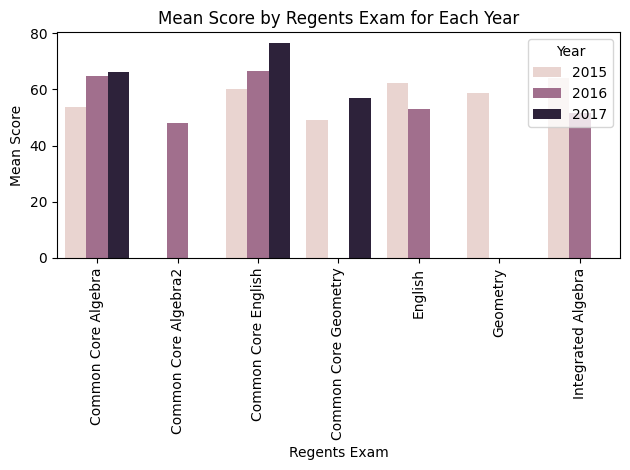

In [44]:
#import seaborn as sns
#import matplotlib.pyplot as plt

first_school_grouped=school_grouped[school_grouped["School Name"] == "Orchard Collegiate Academy"]

sns.barplot(
    data=first_school_grouped,
    x="Regents Exam",
    y="Mean Score",
    hue="Year"
)

plt.xticks(rotation=90)
plt.title("Mean Score by Regents Exam for Each Year")
plt.tight_layout()
plt.show()


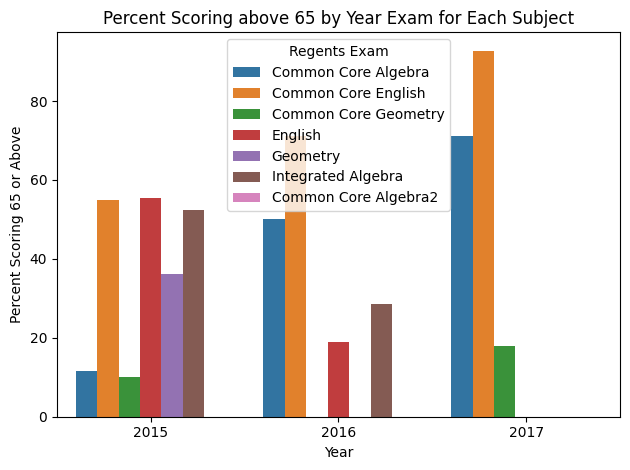

In [47]:
sns.barplot(
    data=first_school_grouped,
    x="Year",
    y="Percent Scoring 65 or Above",
    hue="Regents Exam"
)

#plt.xticks(rotation=45)
plt.title("Percent Scoring above 65 by Year Exam for Each Subject")
plt.tight_layout()
plt.show()

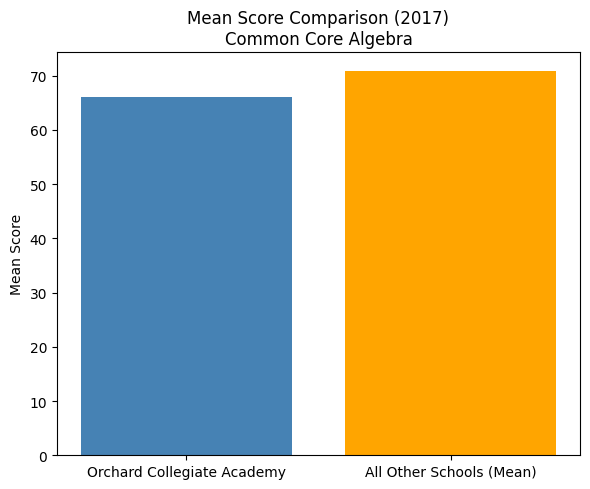

In [42]:
## comparion with all others

subset_group1 = school_grouped[
    (school_grouped["Year"] ==2017) &
    (school_grouped["Regents Exam"] == "Common Core Algebra")
]

# Orchard value
first_school_value1 = subset_group1[subset_group1["School Name"] == "Orchard Collegiate Academy"]["Mean Score"].iloc[0]

# Mean of all other schools
others_school_value1 = subset_group1[subset_group1["School Name"] != "Orchard Collegiate Academy"]["Mean Score"].mean()

# Prepare data for plotting
labels = ["Orchard Collegiate Academy", "All Other Schools (Mean)"]
values = [first_school_value1, others_school_value1]

# Plot
plt.figure(figsize=(6,5))
plt.bar(labels, values, color=["steelblue", "orange"])

plt.ylabel("Mean Score")
plt.title("Mean Score Comparison (2017)\nCommon Core Algebra")
plt.tight_layout()
plt.show()

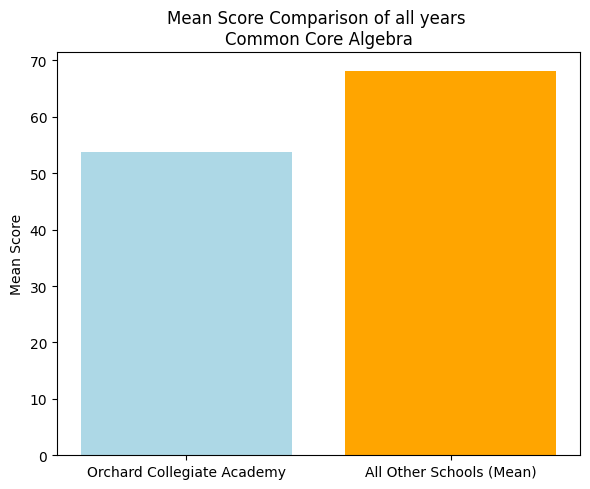

In [38]:
## comparion with all others

subset_group2 = school_grouped[school_grouped["Regents Exam"] == "Common Core Algebra"]

# Orchard value
first_school_value2 = subset_group2[subset_group2["School Name"] == "Orchard Collegiate Academy"]["Mean Score"].iloc[0]

# Mean of all other schools
others_school_value2 = subset_group2[subset_group2["School Name"] != "Orchard Collegiate Academy"]["Mean Score"].mean()

# Prepare data for plotting
labels = ["Orchard Collegiate Academy", "All Other Schools (Mean)"]
values = [first_school_value2, others_school_value2]

# Plot
plt.figure(figsize=(6,5))
plt.bar(labels, values, color=["lightblue", "orange"])

plt.ylabel("Mean Score")
plt.title("Mean Score Comparison of all years \nCommon Core Algebra")
plt.tight_layout()
plt.show()


**Conclusion**

Data had too many NA or non numric rows. Filtering reduced it to almost half.

Many subjects were missing for the selcted school.

For selcted school, mean score for common core algebra was less than mean scores for all other Highschools for year 2017 and all years.
